In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/retail_sales_engineered.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,Year,Month,Week,DayOfWeek,Sales_Lag_1,Sales_Lag_2,Sales_MA_4,Holiday_Flag
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,5347.45,...,8.106,False,2010,2,5,4,0.00,0.00,NaN,0
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,5347.45,...,8.106,True,2010,2,6,4,24924.50,0.00,NaN,1
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,5347.45,...,8.106,False,2010,2,7,4,46039.49,24924.50,NaN,0
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,5347.45,...,8.106,False,2010,2,8,4,41595.55,46039.49,32990.77,0
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,5347.45,...,8.106,False,2010,3,9,4,19403.54,41595.55,32216.62,0


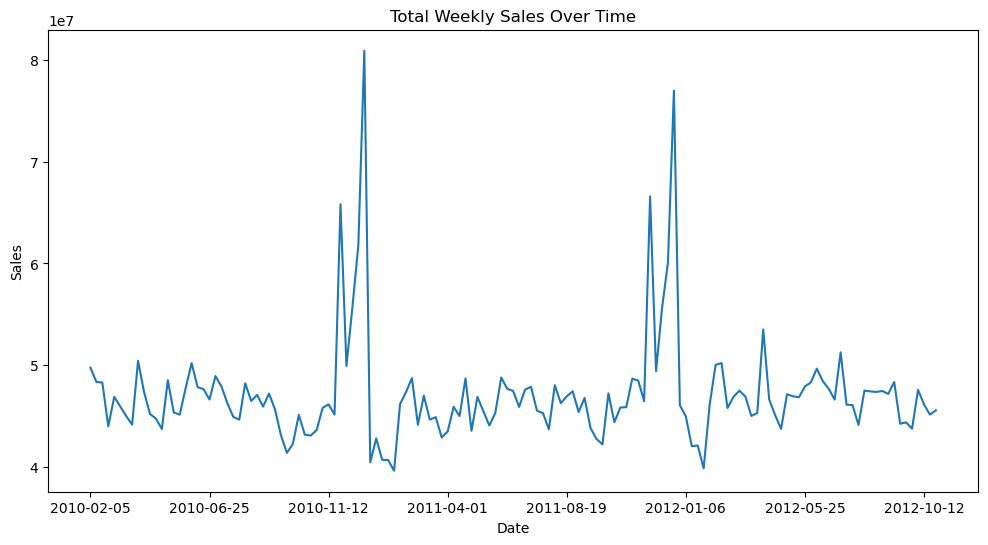

In [ ]:
# Basic KPI Analysis: Total Sales Over Time.
sales_over_time = df.groupby("Date")["Weekly_Sales"].sum()

plt.figure(figsize=(12,6))
sales_over_time.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
# Top and Bottom Performing Stores.
store_sales = df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

print("🏆 Top 5 Stores:\n", store_sales.head(5))
print("\n🔻 Bottom 5 Stores:\n", store_sales.tail(5))

🏆 Top 5 Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

🔻 Bottom 5 Stores:
 Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64


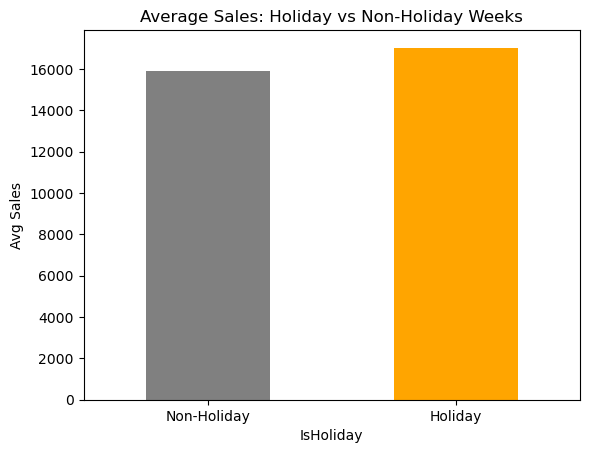

In [4]:
# Holiday Impact on Sales.
holiday_sales = df.groupby("IsHoliday")["Weekly_Sales"].mean()
holiday_sales.plot(kind="bar", color=["gray", "orange"])
plt.title("Average Sales: Holiday vs Non-Holiday Weeks")
plt.ylabel("Avg Sales")
plt.xticks([0,1], ["Non-Holiday", "Holiday"], rotation=0)
plt.show()

In [5]:
#MarkDown Effectiveness.
markdown_cols = [col for col in df.columns if "MarkDown" in col]

for col in markdown_cols:
    corr = df[col].corr(df["Weekly_Sales"])
    print(f"Correlation of {col} with Sales: {corr:.3f}")

Correlation of MarkDown1 with Sales: 0.053
Correlation of MarkDown2 with Sales: 0.020
Correlation of MarkDown3 with Sales: 0.039
Correlation of MarkDown4 with Sales: 0.034
Correlation of MarkDown5 with Sales: 0.056


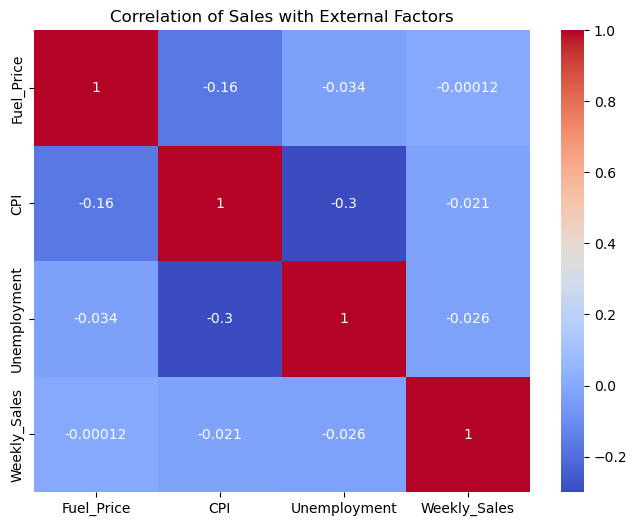

In [6]:
#External Factors Correlation.
external_factors = ["Fuel_Price", "CPI", "Unemployment"]

corr_matrix = df[external_factors + ["Weekly_Sales"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation of Sales with External Factors")
plt.show()